## Dataset cachexia - Exploração de dados, pré-processamento e análise estatística univariada
Nesta secção vamos trabalhar com os dados do dataset Cachexia : 

*"Concentrations of 63 metabolites in 77 urine samples from cancer patients, measured by 1H NMR (Eisner et al, 2011). Metadata defines the two groups: control and cachexic patients."*

Importação e análise da dimensão dos dados

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
# para desenhar os gráficos dentro do notebook
%matplotlib inline


In [2]:
data = pd.read_csv('data_cachexia.csv',sep=',', index_col = 0)
meta = pd.read_csv('meta_cachexia.csv',sep=',', index_col = 0)
print (data.shape)
print (meta.shape)
data.head()

(77, 63)
(77, 1)


,1.6-Anhydro-beta-D-glucose,1-Methylnicotinamide,2-Aminobutyrate,2-Hydroxyisobutyrate,2-Oxoglutarate,3-Aminoisobutyrate,3-Hydroxybutyrate,3-Hydroxyisovalerate,3-Indoxylsulfate,4-Hydroxyphenylacetate,...,Tryptophan,Tyrosine,Uracil,Valine,Xylose,cis-Aconitate,myo-Inositol,trans-Aconitate,pi-Methylhistidine,tau-Methylhistidine
Patient ID,,,,,,,,,,,,,,,,,,,,,
PIF_178,40.85,65.37,18.73,26.05,71.52,1480.30,56.83,10.07,566.80,120.30,...,259.82,290.03,111.05,86.49,72.24,237.46,135.64,51.94,157.59,160.77
PIF_087,62.18,340.36,24.29,41.68,67.36,116.75,43.82,79.84,368.71,432.68,...,83.10,167.34,46.99,109.95,192.48,333.62,376.15,217.02,307.97,130.32
PIF_090,270.43,64.72,12.18,65.37,23.81,14.30,5.64,23.34,665.14,292.95,...,82.27,60.34,31.50,59.15,2164.62,330.30,86.49,58.56,145.47,83.93
NETL_005_V1,154.47,52.98,172.43,74.44,1199.91,555.57,175.91,25.03,411.58,214.86,...,235.10,323.76,30.57,102.51,125.21,1863.11,247.15,75.94,249.64,254.68
PIF_115,22.20,73.70,15.64,83.93,33.12,29.67,76.71,69.41,165.67,97.51,...,103.54,142.59,44.26,160.77,186.79,101.49,749.95,98.49,84.77,79.84


Sumário dos dados

In [3]:
data.describe()

,1.6-Anhydro-beta-D-glucose,1-Methylnicotinamide,2-Aminobutyrate,2-Hydroxyisobutyrate,2-Oxoglutarate,3-Aminoisobutyrate,3-Hydroxybutyrate,3-Hydroxyisovalerate,3-Indoxylsulfate,4-Hydroxyphenylacetate,...,Tryptophan,Tyrosine,Uracil,Valine,Xylose,cis-Aconitate,myo-Inositol,trans-Aconitate,pi-Methylhistidine,tau-Methylhistidine
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,...,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,105.630390,71.573636,18.159740,37.250649,145.087143,76.756364,21.717013,21.647792,218.879221,112.021039,...,66.243117,81.757273,35.557662,35.667013,100.933377,204.219740,135.397532,40.630390,370.288312,89.686883
std,130.025595,133.192811,27.614526,23.956807,342.522174,191.014237,26.198904,24.946091,196.868730,120.812569,...,56.333318,83.248486,35.002894,29.697365,250.216325,278.141989,170.266474,39.566754,530.689300,77.239064
min,4.710000,6.420000,1.280000,4.850000,5.530000,2.610000,1.700000,0.920000,27.660000,15.490000,...,8.670000,4.220000,3.100000,4.100000,10.070000,12.940000,11.590000,4.900000,11.360000,8.000000
25%,28.790000,15.800000,5.260000,15.800000,22.420000,11.700000,5.990000,5.260000,82.270000,41.680000,...,21.330000,23.570000,11.940000,12.180000,29.960000,36.230000,30.270000,12.430000,67.360000,27.390000
50%,45.600000,36.600000,10.490000,32.460000,55.150000,22.650000,11.700000,12.550000,144.030000,70.110000,...,46.990000,60.340000,27.390000,33.120000,50.400000,129.020000,78.260000,26.840000,162.390000,68.720000
75%,141.170000,73.700000,19.490000,54.600000,92.760000,56.260000,29.960000,30.270000,333.620000,145.470000,...,96.540000,113.300000,44.260000,50.400000,89.120000,254.680000,167.340000,57.400000,387.610000,130.320000
max,685.400000,1032.770000,172.430000,93.690000,2465.130000,1480.300000,175.910000,164.020000,1043.150000,796.320000,...,259.820000,539.150000,179.470000,160.770000,2164.620000,1863.110000,854.060000,217.020000,2697.280000,317.350000


Sumário dos metadados 

In [4]:
meta.describe()

,Muscle.loss
count,77
unique,2
top,cachexic
freq,47


**Ex. 1) Calcule a frequência de cada categoria nos metadados**

In [9]:
freq = meta["Muscle.loss"].value_counts()
#meta.groupby("Muscle.loss").size()
freq

cachexic    47
control     30
Name: Muscle.loss, dtype: int64

**Ex.2) Verifique que não há valores em falta nos dados.**

In [12]:
print(meta.isnull().values.sum())
print(data.isnull().values.sum())

0
0


Para cada coluna apresentar o intervalo de valores

In [13]:
data.apply(lambda x: str(x.min())+"---"+str( x.max()))

1.6-Anhydro-beta-D-glucose       4.71---685.4
1-Methylnicotinamide           6.42---1032.77
2-Aminobutyrate                 1.28---172.43
2-Hydroxyisobutyrate             4.85---93.69
2-Oxoglutarate                 5.53---2465.13
                                   ...       
cis-Aconitate                 12.94---1863.11
myo-Inositol                   11.59---854.06
trans-Aconitate                  4.9---217.02
pi-Methylhistidine            11.36---2697.28
tau-Methylhistidine              8.0---317.35
Length: 63, dtype: object

Criar um gráfico que permita visualizar os valores dos metabolitos "Alanine", "Citrate" e "Creatinine" para os pacientes de control. 

<AxesSubplot: xlabel='Patient ID'>

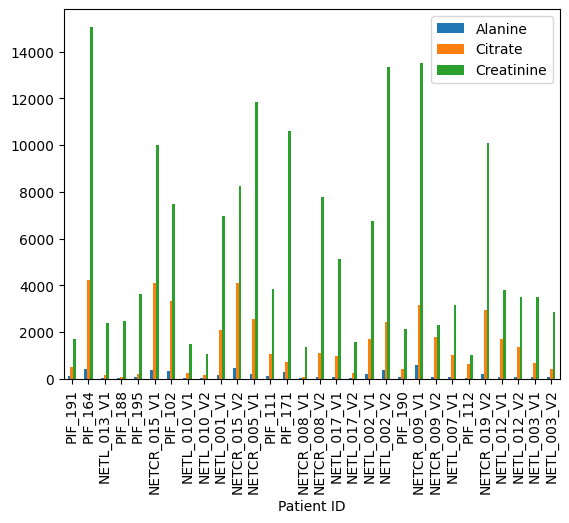

In [14]:
data_control = data[meta["Muscle.loss"]=="control"]
data_control.iloc[:,[13,17,19]].plot.bar()

**Ex.3) Exemplo de discretização de dados - altere os dados do metabolito Citrate de valor continuo para discretos: 
    "elevado", "baixo" consoante o valor seja: maior ou menor que a média.**

In [16]:
cit = data.Citrate.copy()

mean=cit.mean()
cit[cit>mean]="elevado"
cit[cit!= "elevado"]="baixo"
cit

Patient ID
PIF_178         elevado
PIF_087         elevado
PIF_090           baixo
NETL_005_V1     elevado
PIF_115           baixo
                 ...   
NETCR_019_V2    elevado
NETL_012_V1       baixo
NETL_012_V2       baixo
NETL_003_V1       baixo
NETL_003_V2       baixo
Name: Citrate, Length: 77, dtype: object

Standardização dos dados (usando scikit-learn)

<AxesSubplot: xlabel='Patient ID'>

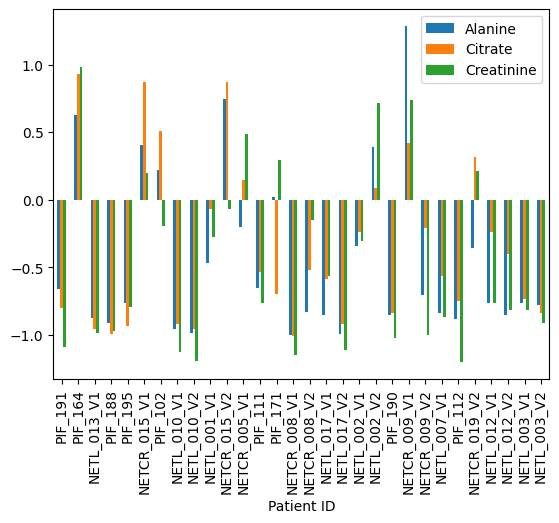

In [18]:
from sklearn import preprocessing
array_data = preprocessing.scale(data)#, with_mean = False)
data_scale =  pd.DataFrame(array_data, index =data.index , columns = data.columns)
data_control = data_scale[meta["Muscle.loss"]=="control"]
data_control.iloc[:,[13,17,19]].plot.bar()

**Ex. 4) Cria um boxplot para ver a distribuição dos valores dos metabolitos Asparagine, Acetate, Succinate.**

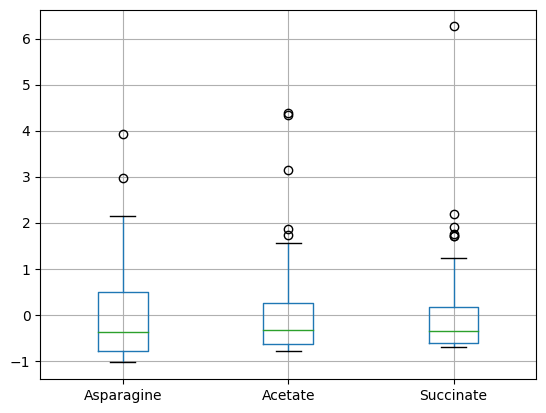

In [20]:
box_plot = data_scale.boxplot(column=["Asparagine", "Acetate", "Succinate"])

Transformação logarítmica

In [21]:
log_data = np.log2(data)
log_data.apply(lambda x: str(x.min())+"---"+str( x.max()))

1.6-Anhydro-beta-D-glucose     2.2357270598380583---9.420802381631812
1-Methylnicotinamide           2.682573297347578---10.012303283487379
2-Aminobutyrate               0.35614381022527536---7.429866991382293
2-Hydroxyisobutyrate           2.277984747299765---6.5498231649670045
2-Oxoglutarate                 2.4672794804599825---11.26744801459588
                                               ...                   
cis-Aconitate                  3.693765712217783---10.863497139709002
myo-Inositol                    3.534808661231747---9.738193616367314
trans-Aconitate                 2.292781749227846---7.761684193602206
pi-Methylhistidine            3.5058909297299574---11.397289577701605
tau-Methylhistidine                           3.0---8.309931032395417
Length: 63, dtype: object

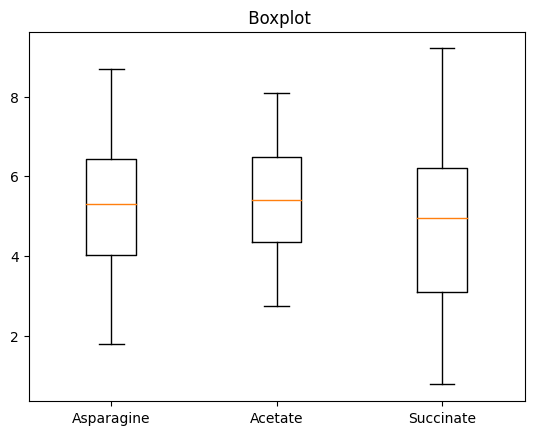

In [24]:
indexes = [ind for ind in range(len(data.columns)) if data.columns[ind] in ["Asparagine", "Acetate", "Succinate"]]
labels = ["Asparagine", "Acetate", "Succinate"]
sel_log_data = log_data.iloc[:,indexes].values

plt.boxplot(sel_log_data)
plt.xticks([1,2,3],labels)
plt.title(" Boxplot")
plt.show()

### Exemplos com testes estatísticos


**Ex. 5) Verifica se a distribuição do metabolito Alanine segue a distribuição normal quer de forma visual (QQplot), quer usando o teste de Shapiro.**

In [25]:
import statsmodels.api as sm
from scipy import stats

(array([31., 15., 13.,  9.,  5.,  0.,  1.,  1.,  1.,  1.]),
 array([  16.78 ,  146.393,  276.006,  405.619,  535.232,  664.845,
         794.458,  924.071, 1053.684, 1183.297, 1312.91 ]),
 <BarContainer object of 10 artists>)

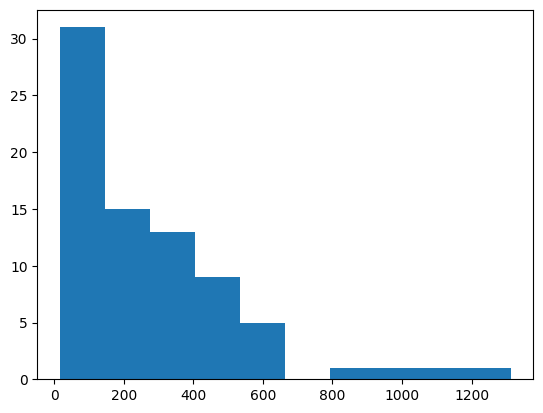

In [26]:
plt.close()
data_alanine = data.Alanine
plt.hist(data_alanine)

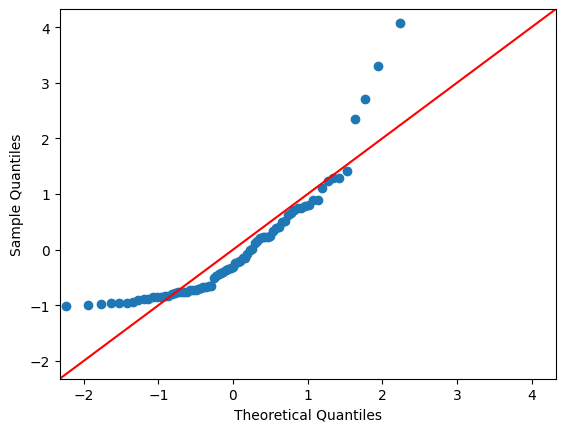

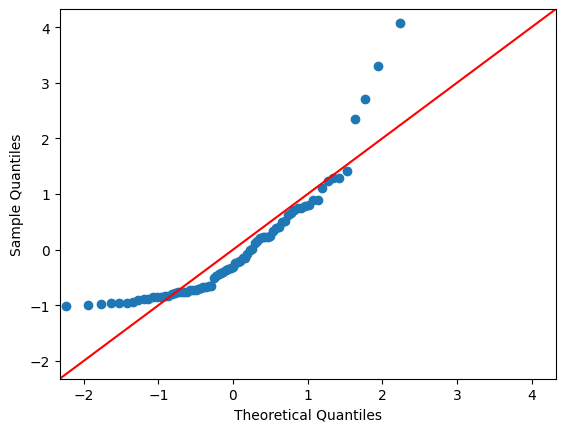

In [29]:
qq_plot = sm.qqplot(preprocessing.scale(data_alanine), line="45")
qq_plot

In [30]:
w, p_value = stats.shapiro(data_alanine)
p_value
#Rejeita H0

4.927390762077266e-08

**Ex. 6) Verifica se a concentração de Alanina entre as duas categorias é semelhante, visualmente (usando histogramas) e usando testes estatísticos apropriados.**

In [ ]:
#nao parametrico - 
#podemos usar os logaritmos dos dados e usar t-test


Quais os metabolitos que têm concentrações significativamente diferentes entre os dois grupos: control e cachexic. 

In [ ]:
type(data[meta['Muscle.loss']=='control'])

In [ ]:
metabs_de_tt = lambda x : stats.ttest_ind(x[meta['Muscle.loss']=='control'],x[meta['Muscle.loss']=='cachexic'])

data.columns[data.apply(lambda x: metabs_de_tt(x)[1]<0.05)]

**Ex.7) Repita o anterior usando Testes não paramétricos - Mann-Whitney U test**

In [ ]:
#O mesmo que o outro mas para todas as variaveis

Correções para testes múltiplos

In [ ]:
pvalues_tt = data.apply(lambda x: metabs_de_tt(x)[1])
pvalues_tt
type(pvalues_tt)

In [ ]:
import statsmodels.stats as sm
corr_pvalues = sm.multitest.multipletests(pvalues_tt, method = "fdr_bh")[1]
corr_pvalues

### Correlações

In [ ]:
data_glucose = data.Glucose
data_sucrose = data.Sucrose

plt.scatter(data_glucose, data_sucrose)
plt.show()

In [ ]:
corr, _ = stats.pearsonr(data_glucose, data_sucrose)
corr

In [ ]:
sp_corr, _ = stats.spearmanr(data_glucose, data_sucrose)
sp_corr

In [ ]:
corr_matrix = data.corr()
corr_matrix

In [ ]:
type(corr_matrix)

In [ ]:
corr_matrix_sp = data.corr(method = "spearman")
corr_matrix_sp

In [ ]:
import seaborn as sn
sn.heatmap(corr_matrix.iloc[1:10,1:10], annot=True)
plt.show()

In [ ]:
sn.heatmap(corr_matrix.iloc[1:20,1:20], annot=False)
plt.show()

Análise de variância / regressão linear

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

lm = ols("data.Leucine~data.Valine", data).fit()
anova_lm(lm)

In [ ]:
lm.summary()

In [ ]:
lm.rsquared

**Ex.8) Repita o anterior adicionando a Glucose como variável dependente**

In [ ]:
#fazer leucina em função da valina e da glucose

In [ ]:
data["MuscleLoss"] = meta["Muscle.loss"]

In [ ]:
lm3 = ols("data.Leucine~data.MuscleLoss", data).fit()

In [ ]:
lm3.summary()